<a href="https://colab.research.google.com/github/MarpuriSathvik/ML-HW4/blob/main/SATHVIK_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
!{sys.executable} -m pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633965 sha256=1bcc6fc9bcc5bf58f6bb2eff8c117f10462681fa4ec8bdae0be827d20b97550e
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [2]:
import pandas as pd
import numpy as np
from surprise import SVD
import numpy as np
import surprise
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBasic
from matplotlib import pyplot as plt

In [3]:
rating_dataset = pd.read_csv('/content/drive/MyDrive/MG/ratings_small.csv')
rating_dataset

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [4]:
rating_dataset.info

<bound method DataFrame.info of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [5]:
rating_dataset.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6365     4.0  1070940363
100002     671     6385     2.5  1070979663
100003     671     6565     3.5  1074784724

[100004 rows x 4 columns]>

In [6]:
rating_dataset.isnull()

,userId,movieId,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99999,False,False,False,False
100000,False,False,False,False
100001,False,False,False,False
100002,False,False,False,False


In [7]:
rating_dataset['userId'].value_counts()

547    2391
564    1868
624    1735
15     1700
73     1610
       ... 
296      20
289      20
249      20
221      20
1        20
Name: userId, Length: 671, dtype: int64

In [8]:
rating_dataset['movieId'].value_counts()

356       341
296       324
318       311
593       304
260       291
         ... 
98604       1
103659      1
104419      1
115927      1
6425        1
Name: movieId, Length: 9066, dtype: int64

In [9]:
rating_dataset['rating'].value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

In [10]:
rating_dataset['timestamp'].value_counts()

1469278482    87
1462644085    82
1462644086    70
829471720     38
828214012     37
              ..
1476478061     1
1476623034     1
1476555047     1
1476478069     1
1074784724     1
Name: timestamp, Length: 78141, dtype: int64

In [11]:
read = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
ratings_data = Dataset.load_from_file("/content/drive/MyDrive/MG/ratings_small.csv",read)

In [12]:
svd_algo = SVD(biased = False)

In [13]:
PMF_result = cross_validate(svd_algo, ratings_data, measures=['RMSE', 'MAE'],cv=5,verbose = True)
print("PMF Results -",PMF_result)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0176  1.0147  1.0092  1.0060  1.0008  1.0097  0.0060  
MAE (testset)     0.7839  0.7830  0.7783  0.7789  0.7724  0.7793  0.0041  
Fit time          5.20    5.19    5.20    5.25    7.34    5.64    0.85    
Test time         0.22    0.27    0.19    0.19    0.23    0.22    0.03    
PMF Results - {'test_rmse': array([1.0175993 , 1.01469453, 1.0091737 , 1.00599388, 1.00081823]), 'test_mae': array([0.78390606, 0.78304352, 0.7783415 , 0.77893006, 0.77241416]), 'fit_time': (5.2029709815979, 5.193829298019409, 5.198883056640625, 5.250762701034546, 7.337373971939087), 'test_time': (0.2201824188232422, 0.26659297943115234, 0.19373798370361328, 0.19483160972595215, 0.22548627853393555)}


In [14]:
PMF_results_df = pd.DataFrame.from_dict(PMF_result)
PMF_results_df

,test_rmse,test_mae,fit_time,test_time
0,1.017599,0.783906,5.202971,0.220182
1,1.014695,0.783044,5.193829,0.266593
2,1.009174,0.778342,5.198883,0.193738
3,1.005994,0.778930,5.250763,0.194832
4,1.000818,0.772414,7.337374,0.225486


In [15]:
print("Average PMF RMSE value", PMF_results_df['test_rmse'].mean())

Average PMF RMSE value 1.009655928165511


In [16]:
print("Average PMF MAE value", PMF_results_df['test_mae'].mean())

Average PMF MAE value 0.7793270608984133


In [17]:
sim_options = {'user_based': True }
user_based = KNNBasic(sim_options=sim_options)

In [18]:
user_based_results = cross_validate(user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('user based results -', user_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9634  0.9740  0.9735  0.9564  0.9713  0.9677  0.0068  
MAE (testset)     0.7422  0.7467  0.7498  0.7358  0.7473  0.7443  0.0049  
Fit time          0.16    0.19    0.19    0.28    0.17    0.20    0.04    
Test time         2.12    1.56    1.87    1.78    1.73    1.81    0.18    
user based results - {'test_rmse': array([0.96340701, 0.97397079, 0.9734671 , 0.95638405, 0.97132019]), 'test_mae': array([0.74221365, 0.74666333, 0.74978245, 0.73575166, 0.7473159 ]), 'fit_time': (0.1

In [19]:
user_based_results_df = pd.DataFrame.from_dict(user_based_results)
user_based_results_df

,test_rmse,test_mae,fit_time,test_time
0,0.963407,0.742214,0.163969,2.115373
1,0.973971,0.746663,0.191256,1.563633
2,0.973467,0.749782,0.186842,1.873688
3,0.956384,0.735752,0.278455,1.783716
4,0.971320,0.747316,0.174902,1.733865


In [20]:
print("Average User Based RMSE value", user_based_results_df['test_rmse'].mean())

Average User Based RMSE value 0.96770982843381


In [21]:
print("Average User Based MAE value", user_based_results_df['test_mae'].mean())

Average User Based MAE value 0.7443453974949088


In [22]:
sim_options = {'user_based': False }
item_based = KNNBasic(sim_options=sim_options)

In [23]:
item_based_results = cross_validate(item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('item based results -', item_based_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9354  0.9277  0.9355  0.9374  0.9359  0.9344  0.0034  
MAE (testset)     0.7233  0.7161  0.7221  0.7238  0.7188  0.7208  0.0029  
Fit time          5.20    5.18    6.22    5.08    6.76    5.69    0.68    
Test time         7.48    9.65    8.27    7.87    7.85    8.22    0.76    
item based results - {'test_rmse': array([0.93537567, 0.92774412, 0.93551693, 0.93743204, 0.9359028 ]), 'test_mae': array([0.72331818, 0.71607999, 0.72212031, 0.72378296, 0.71875093]), 'fit_time': (5.2

In [24]:
item_based_results_df = pd.DataFrame.from_dict(item_based_results)
item_based_results_df

,test_rmse,test_mae,fit_time,test_time
0,0.935376,0.723318,5.200722,7.480485
1,0.927744,0.716080,5.184998,9.653009
2,0.935517,0.722120,6.215427,8.269329
3,0.937432,0.723783,5.080829,7.871630
4,0.935903,0.718751,6.759574,7.847363


In [25]:
print("Average Item Based RMSE value", item_based_results_df['test_rmse'].mean())

Average Item Based RMSE value 0.9343943121864514


In [26]:
print("Average Item Based MAE value", item_based_results_df['test_mae'].mean())

Average Item Based MAE value 0.7208104738361827


In [27]:
sim_options = {'name':'cosine','user_based': True }
cosine_user_based = KNNBasic(sim_options=sim_options)

In [28]:
cosine_ub_results = cross_validate(cosine_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on User Based -', cosine_ub_results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9971  0.9973  0.9850  0.9878  1.0058  0.9946  0.0074  
MAE (testset)     0.7712  0.7713  0.7586  0.7660  0.7757  0.7686  0.0058  
Fit time          0.40    0.44    0.47    0.54    0.76    0.52    0.13    
Test time         1.93    1.60    2.05    2.73    1.96    2.06    0.37    
Impact of Cosine on User Based - {'test_rmse': array([0.99707052, 0.99725682, 0.98499347, 0.98780485, 1.00580203]), 'test_mae': array([0.77124499, 0.77126991, 0.75863683, 0.76604432, 0.7

In [29]:
sim_options = {'name':'msd','user_based': True }
msd_user_based = KNNBasic(sim_options=sim_options)

In [30]:
msd_ub_results = cross_validate(msd_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on User Based -', msd_ub_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9686  0.9674  0.9641  0.9799  0.9628  0.9686  0.0061  
MAE (testset)     0.7435  0.7437  0.7381  0.7541  0.7420  0.7443  0.0053  
Fit time          0.14    0.18    0.28    0.21    0.19    0.20    0.05    
Test time         1.73    1.70    1.86    1.76    1.60    1.73    0.08    
Impact of MSD on User Based - {'test_rmse': array([0.9686305 , 0.96739535, 0.96409642, 0.97993318, 0.96281109]), 'test_mae': array([0.74354333, 0.74374276, 0.73806662, 0.75410366, 0.74201362]), 'fit_ti

In [31]:
sim_options = {'name':'pearson_baseline','user_based': True }
pb_user_based = KNNBasic(sim_options=sim_options)

In [32]:
pb_ub_results = cross_validate(pb_user_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on User Based -', pb_ub_results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9877  0.9986  0.9940  1.0001  0.9991  0.9959  0.0046  
MAE (testset)     0.7647  0.7717  0.7677  0.7707  0.7710  0.7692  0.0026  
Fit time          0.80    0.83    0.85    0.85    1.11    0.89    0.11    
Test time         1.66    1.52    2.00    1.78    2.25  

In [33]:
sim_options = {'name':'cosine','user_based': False }
cosine_item_based = KNNBasic(sim_options=sim_options)

In [34]:
cosine_ib_results = cross_validate(cosine_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Cosine on Item Based -', cosine_ib_results)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9948  0.9950  0.9931  0.9940  0.9956  0.9945  0.0009  
MAE (testset)     0.7748  0.7736  0.7718  0.7742  0.7752  0.7739  0.0012  
Fit time          15.95   17.04   17.19   17.96   16.70   16.97   0.65    
Test time         7.13    7.58    7.82    7.69    7.78    7.60    0.25    
Impact of Cosine on Item Based - {'test_rmse': array([0.99482156, 0.99500479, 0.9930661 , 0.99401945, 0.99559017]), 'test_mae': array([0.77481359, 0.77361073, 0.77177797, 0.77419171, 0.7

In [35]:
sim_options = {'name':'msd','user_based': False }
msd_item_based = KNNBasic(sim_options=sim_options)

In [36]:
msd_ib_results = cross_validate(msd_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of MSD on Item Based -', msd_ib_results)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9293  0.9442  0.9345  0.9362  0.9353  0.9359  0.0048  
MAE (testset)     0.7179  0.7255  0.7221  0.7210  0.7237  0.7220  0.0025  
Fit time          4.54    5.22    4.76    4.57    4.99    4.82    0.26    
Test time         7.71    8.33    7.75    8.34    7.51    7.93    0.34    
Impact of MSD on Item Based - {'test_rmse': array([0.92934944, 0.94421223, 0.93451963, 0.93615219, 0.93532467]), 'test_mae': array([0.71792888, 0.72547236, 0.72212269, 0.72103995, 0.72366747]), 'fit_ti

In [37]:
sim_options = {'name':'pearson_baseline','user_based': False }
pb_item_based = KNNBasic(sim_options=sim_options)

In [38]:
pb_ib_results = cross_validate(pb_item_based,ratings_data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Impact of Pearson similarities on Item Based -', pb_ib_results)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9350  0.9393  0.9351  0.9473  0.9491  0.9412  0.0060  
MAE (testset)     0.7089  0.7106  0.7083  0.7167  0.7183  0.7126  0.0041  
Fit time          11.31   12.80   11.89   10.53   10.37   11.38   0.90    
Test time         7.77    7.34    7.43    7.27    7.42  

In [39]:
names = ['cosine', 'msd', 'pearson_baseline']
metrics = ['RMSE', 'MAE']
result_for_plot = {'user_based_cf': dict(),'item_based_cf': dict()}

for name in names:
    user_based = KNNBasic(sim_options={'name': name, 'user_based': True})
    item_based = KNNBasic(sim_options={'name': name, 'user_based': False})   
    user_based_combined = cross_validate(user_based, ratings_data, metrics, cv=5, verbose=True)
    item_based_combined = cross_validate(item_based, ratings_data, metrics, cv=5, verbose=True)
    result_for_plot['user_based_cf'][name] = user_based_combined
    result_for_plot['item_based_cf'][name] = item_based_combined

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9859  0.9981  0.9900  0.9905  0.9996  0.9928  0.0052  
MAE (testset)     0.7598  0.7726  0.7663  0.7678  0.7698  0.7673  0.0043  
Fit time          0.49    0.52    0.52    0.43    0.46    0.49    0.03    
Test time         1.76    2.16    1.69    1.62    1.90    1.83    0.19    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [40]:
graph_data = {'mae': {'cosine': [], 'msd': [],'pearson_baseline': []},'rmse': {'cosine': [],'msd': [],'pearson_baseline': []}}
for i, j in result_for_plot.items():
    for value, result in result_for_plot[i].items():
        graph_data['mae'][value].append(result['test_mae'].mean())
        graph_data['rmse'][value].append(result['test_rmse'].mean())

graph_data

{'mae': {'cosine': [0.7672954646748524, 0.7737848171365552],
  'msd': [0.7446297328024071, 0.7214982629102681],
  'pearson_baseline': [0.7704582049799965, 0.713722386986271]},
 'rmse': {'cosine': [0.992829846213208, 0.9947586210667756],
  'msd': [0.9686230258454541, 0.9353089646808417],
  'pearson_baseline': [0.9972094167747668, 0.942437228654193]}}

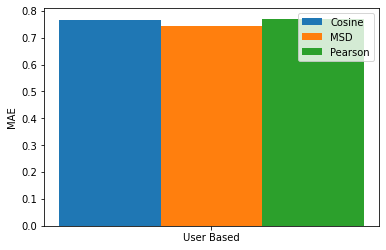

In [41]:
label = ['User Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph_data['mae']['cosine'][0], width)
plt.bar(value, graph_data['mae']['msd'][0], width)
plt.bar(value+0.1, graph_data['mae']['pearson_baseline'][0], width)

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

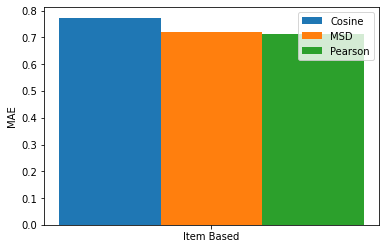

In [42]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph_data['mae']['cosine'][1], width)
plt.bar(value, graph_data['mae']['msd'][1], width)
plt.bar(value+0.1, graph_data['mae']['pearson_baseline'][1], width)

plt.xticks(value, label)
plt.ylabel("MAE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

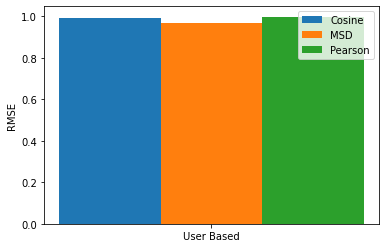

In [43]:
label = ['User Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph_data['rmse']['cosine'][0], width)
plt.bar(value, graph_data['rmse']['msd'][0], width)
plt.bar(value+0.1, graph_data['rmse']['pearson_baseline'][0], width)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

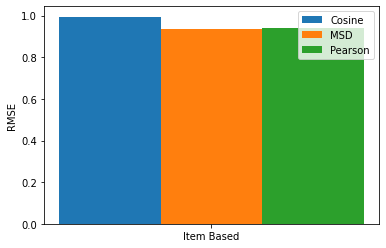

In [44]:
label = ['Item Based']
value = np.arange(len(label))
width = 0.1

plt.bar(value-0.1, graph_data['rmse']['cosine'][1], width)
plt.bar(value, graph_data['rmse']['msd'][1], width)
plt.bar(value+0.1, graph_data['rmse']['pearson_baseline'][1], width)

plt.xticks(value, label)
plt.ylabel("RMSE")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()

In [45]:
k_start = 1
mean = 2000
user_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_user_based = KNNBasic(sim_options={'user_based': True}, k=i)
    cv_user_based = cross_validate(knn_user_based, ratings_data, measures, verbose=True, cv=5)

    start_mean = cv_user_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    user_based_results.append(start_mean)
    print(i)

print(k_start, mean)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2179  1.2100  1.2057  1.2141  1.2078  1.2111  0.0044  
MAE (testset)     0.9081  0.9041  0.9005  0.9077  0.9048  0.9050  0.0028  
Fit time          0.16    0.22    0.19    0.39    0.25    0.24    0.08    
Test time         1.08    1.32    1.14    1.87    1.25    1.33    0.28    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

In [46]:
k_start = 1
mean = 200000
item_based_results = []
measures = ['RMSE', 'MAE']

for i in range(1,100):
    knn_item_based = KNNBasic(sim_options={'user_based': False}, k=i)
    cv_item_based = cross_validate(knn_item_based, ratings_data, measures, verbose=True, cv=5)

    start_mean = cv_item_based['test_rmse'].mean()
    if start_mean < mean:
        mean = start_mean
        k_start = i
    item_based_results.append(start_mean)
    print(i)
print(k_start, mean)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2997  1.3002  1.3061  1.2961  1.3017  1.3007  0.0032  
MAE (testset)     0.9653  0.9652  0.9625  0.9619  0.9717  0.9653  0.0035  
Fit time          6.00    5.05    5.15    6.05    4.67    5.38    0.54    
Test time         5.57    6.09    6.13    5.86    5.81    5.90    0.20    
1
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing

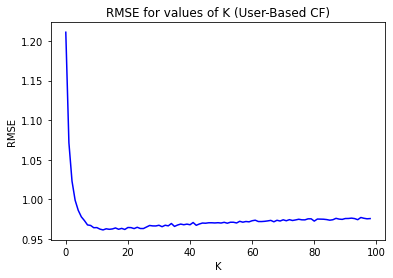

In [47]:
plt.plot(user_based_results, color = 'blue')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (User-Based CF)")
plt.show()

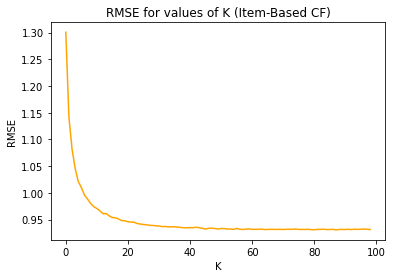

In [48]:
plt.plot(item_based_results, color = 'orange')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (Item-Based CF)")
plt.show()

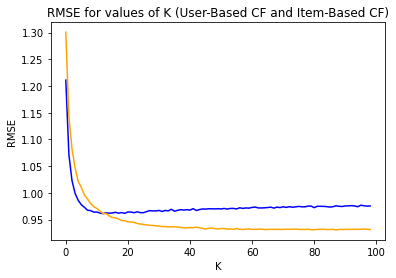

In [49]:
plt.plot(user_based_results, color = 'blue')
plt.plot(item_based_results, color='orange')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K (User-Based CF and Item-Based CF)")
plt.show()

In [50]:
#min value of k for user-based 
min_k_ub = min(user_based_results)
index_min_ub = user_based_results.index(min_k_ub)
print('Value of K with min RMSE for User-Based',index_min_ub)

Value of K with min RMSE for User-Based 12


In [51]:
#min value of k for user-based 
min_k_ib = min(item_based_results)
index_min_ib = item_based_results.index(min_k_ib)
print('Value of K with min RMSE for Item-Based',index_min_ib)

Value of K with min RMSE for Item-Based 87
